# Observable trends based on pymaceutical data
1. The tumor response to treatment graph indicates that drug "Capomulin" had the best response among all other drugs as tumor volume decreased over the time.While the drug "ketopril" had worst response as the size of tumor increased over the time.

2. The metastatic sites to the tretment graph indicates that drug "Capomulin" had best response among all other drugs as it had lowest number of  metastatic sites in comparison to "Infubinol", "Ketapril", and "Placebo".

3. The graph tumor changes over 45 days indicates that "Capomulin" had best response to the treatment as the overall tumor volume is reduced upto 20% over 45 days treament among the mice which received the "Capomulin". While other drugs showed increased in tumor size.

In [317]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem




# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
    #mouse_df=pd.read_csv(mouse_data, index_col=1, parse_dates=True)
    
# Read  mouse data
mouse_df=pd.read_csv(mouse_data)
mouse_df.head(5)

#Read clinical data
clinical_df=pd.read_csv(clinical_data)
clinical_df.head(5)

# Combine the data into a single dataset
combine_df=pd.merge(mouse_df, clinical_df, on="Mouse ID", how="outer")


# Display the data table for preview
combine_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [318]:
#Create dataframe that contains only Drug, Timepoint and Tumor volume
tumor_response=combine_df[["Drug","Timepoint","Tumor Volume (mm3)"]]

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_tumor_response=tumor_response.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
group_tumor_response_mean=group_tumor_response.reset_index()

# Preview DataFrame
group_tumor_response_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [319]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response=combine_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
group_tumor_response=tumor_response.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
group_tumor_response_SEM=group_tumor_response.reset_index()
# Preview DataFrame
group_tumor_response_SEM.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [320]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_mean_df=group_tumor_response_mean.pivot_table(values="Tumor Volume (mm3)", index=["Timepoint"], columns=["Drug"])
# Preview that Reformatting worked
tumor_response_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [328]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_SEM_df=group_tumor_response_SEM.pivot_table(values="Tumor Volume (mm3)", index=["Timepoint"], columns=["Drug"])
# Preview that Reformatting worked
tumor_response_SEM_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


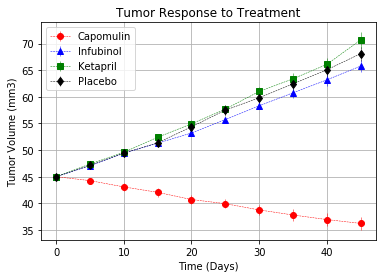

In [343]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_format_list:
    STErrors = tumor_response_SEM_df[drug]
    tumor_treatment_plt = plt.errorbar(tumor_response_mean_df.index,tumor_response_mean_df[drug],STErrors,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Save the Figure
plt.savefig("tumor_response_to_treatment.png")

## Metastatic Response to Treatment

In [335]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_df=combine_df[["Drug","Timepoint","Metastatic Sites"]]
metastatic_df_mean=metastatic_df.groupby(["Drug", "Timepoint"]).mean()

                         
# Convert to DataFrame
metastatic_df_mean.reset_index()
# Preview DataFrame
metastatic_df_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [336]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_df_sem=metastatic_df.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
metastatic_df_sem.reset_index()
# Preview DataFrame
metastatic_df_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [340]:
# Minor Data Munging to Re-Format the Data Frames
met_response_mean_df=metastatic_df_mean.pivot_table(values="Metastatic Sites", index=["Timepoint"], columns=["Drug"])
# Preview that Reformatting worked
met_response_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [338]:
# Minor Data Munging to Re-Format the Data Frames
met_response_SEM_df=metastatic_df_sem.pivot_table(values="Metastatic Sites", index=["Timepoint"], columns=["Drug"])
# Preview that Reformatting worked
met_response_SEM_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


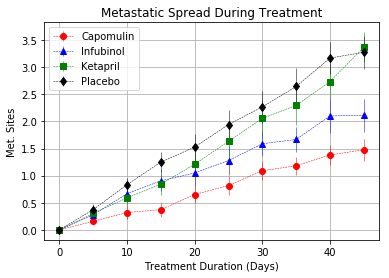

In [341]:
# Generate the Plot (with Error Bars)
drug_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_format_list:
    STErrors = met_response_SEM_df[drug]
    met_treatment_plt = plt.errorbar(met_response_mean_df.index,met_response_mean_df[drug],STErrors,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()

# Save the Figure
plt.savefig("metastic_spread_during_treatment.png")

## Survival Rates

In [342]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_data=combine_df[["Drug","Timepoint","Mouse ID"]]
mouse_df=mouse_data.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
mouse_df.reset_index(inplace=True)
# Preview DataFrame
mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [344]:
# Minor Data Munging to Re-Format the Data Frames
mouse_df_format=mouse_df.pivot_table(values="Mouse ID", index=["Timepoint"], columns=["Drug"])
# Preview the Data Frame
mouse_df_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


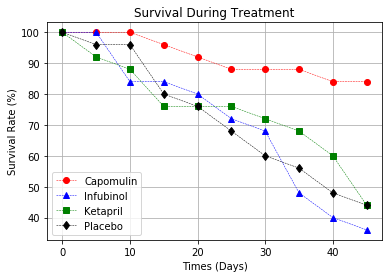

In [345]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_format_list:
    mouse_total = mouse_df_format[drug][0]
    survival_rate = (mouse_df_format[drug]/mouse_total)*100
    survival_treatment_plt = plt.plot(mouse_df_format.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig('survival_during_treatment.png')

## Summary Bar Graph

In [346]:
# Calculate the percent changes for each drug
change_percent=((tumor_response_mean_df.iloc[-1]-tumor_response_mean_df.iloc[0])/45)*100
# Display the data to confirm
change_percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

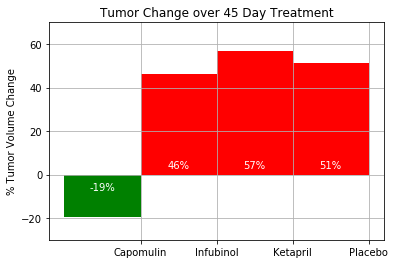

In [348]:
# Splice the data between passing and failing drugs
passing = change_percent< 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(change_percent[drug])for drug in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig('tumor_change_over_45day_treatment.png')